# Magnificent 7 LEAP Strategy Comparison

This notebook tests LEAP strategies across the Magnificent 7 tech stocks (GOOGL, MSFT, AAPL, NVDA, META, AMZN, TSLA) with different strike factors.

## Strategy Import
The LEAP strategy is imported from `strategies/leap_strategy.py`, making it reusable across all notebooks.

## Parameters Tested
- **Strike Factors**: 0.9 (10% ITM), 1.0 (ATM), 1.1 (10% OTM)
- **LEAP Duration**: 365 days (1 year)
- **Roll Threshold**: 90 days before expiration

In [8]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "../..")

from utils.simulation import BacktestSimulation
from strategies.leap_strategy import create_leap_strategy
from datetime import datetime

# Configuration
tickers = ["GOOGL", "MSFT", "AAPL", "NVDA", "META", "AMZN", "TSLA"]  # Mag 7
strike_factors = [0.5, 0.75, 1]  # 10% ITM, ATM, 10% OTM
interest_rate = 0.05
days = 365
roll_threshold = 90

start = datetime(2015, 1, 1)
end = datetime(2025, 12, 31)
initial_cash = 10000

Testing 7 tickers × 3 strike factors = 21 combinations


Ticker: GOOGL | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $350,501.30
Total Return: 3405.01%
Sharpe Ratio: 0.88
Max Drawdown: 70.91%
Annualized Volatility: 52.65%


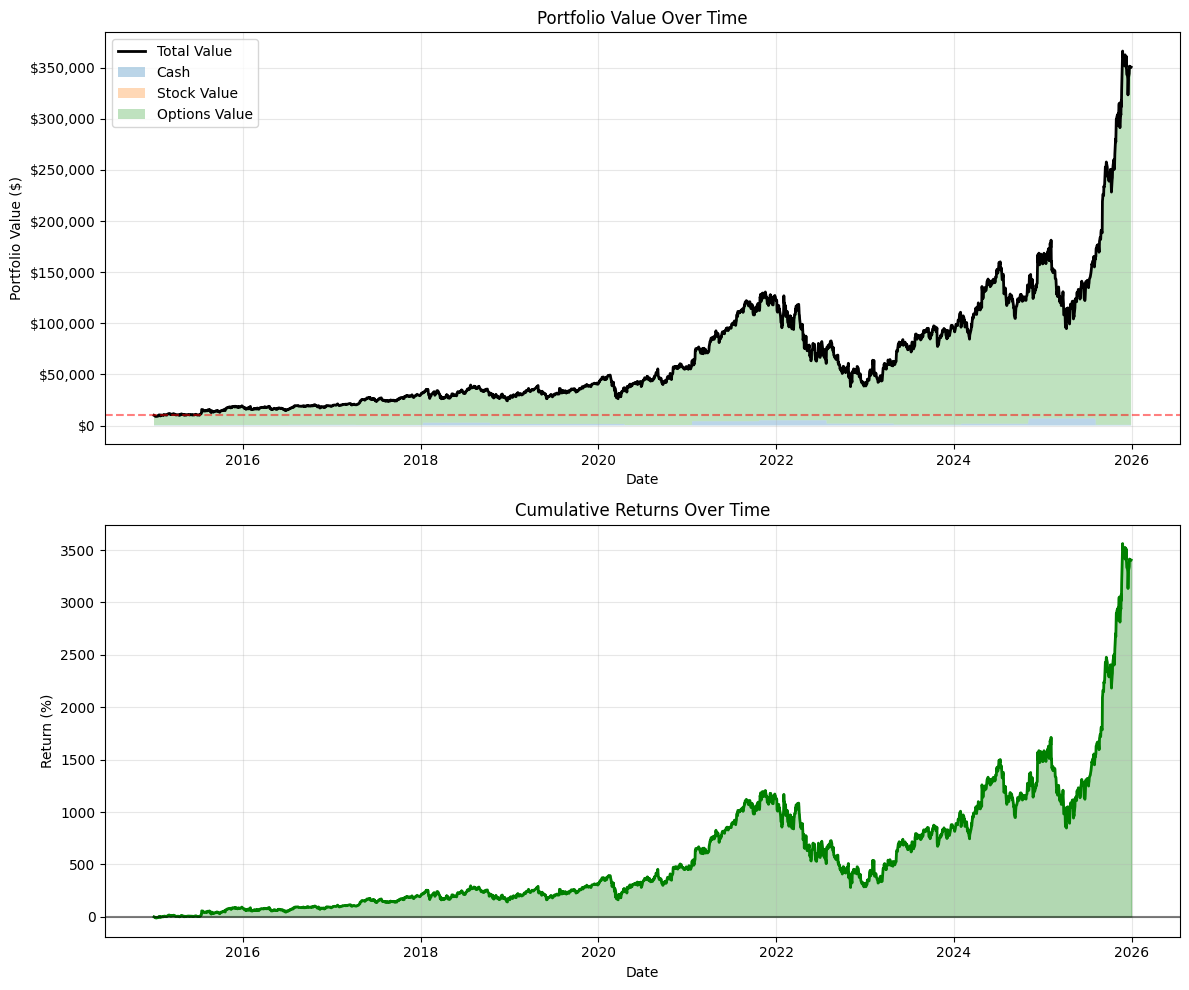


Ticker: GOOGL | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $923,811.74
Total Return: 9138.12%
Sharpe Ratio: 0.89
Max Drawdown: 91.54%
Annualized Volatility: 91.46%


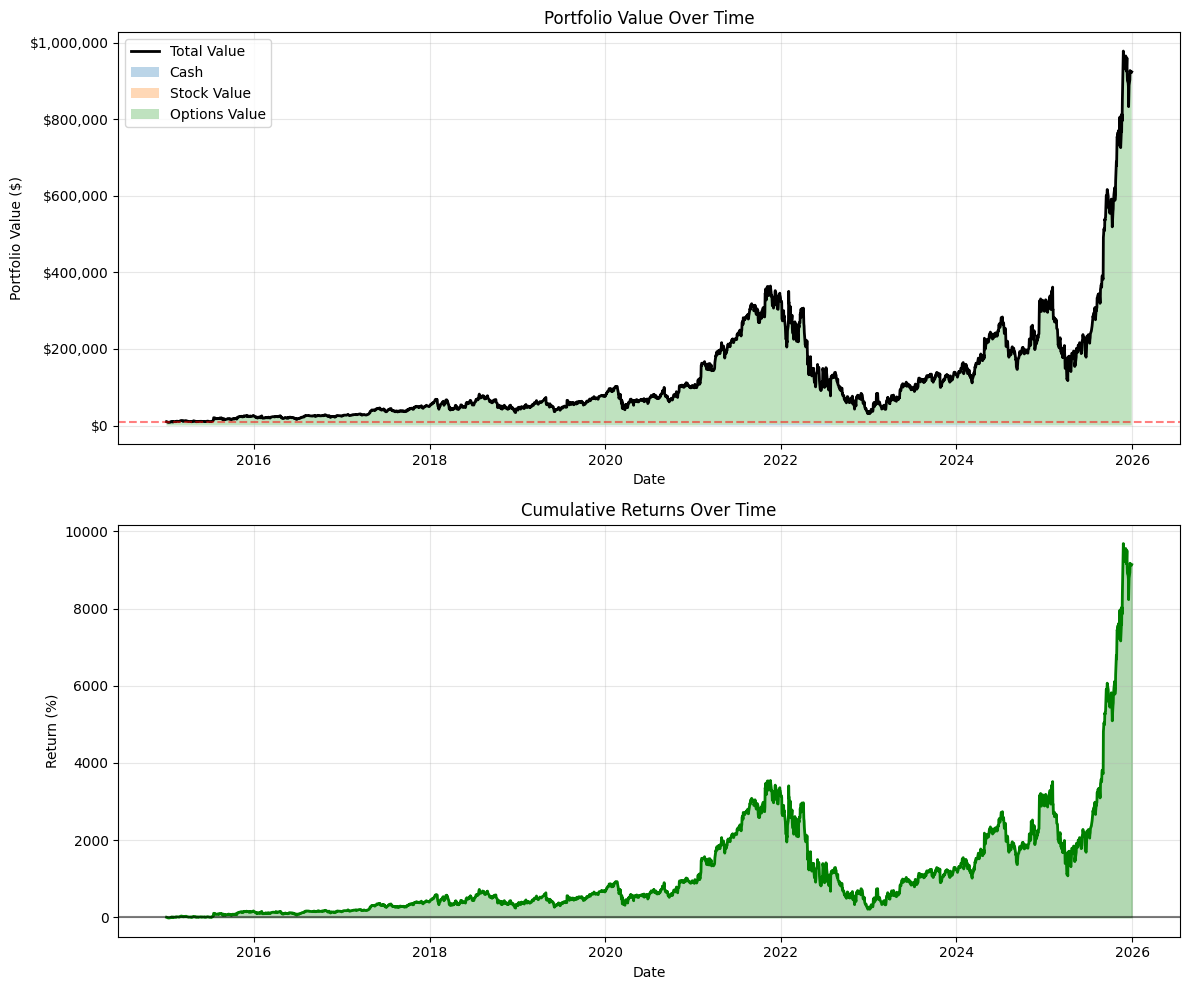


Ticker: GOOGL | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $842,942.45
Total Return: 8329.42%
Sharpe Ratio: 0.98
Max Drawdown: 98.77%
Annualized Volatility: 176.64%


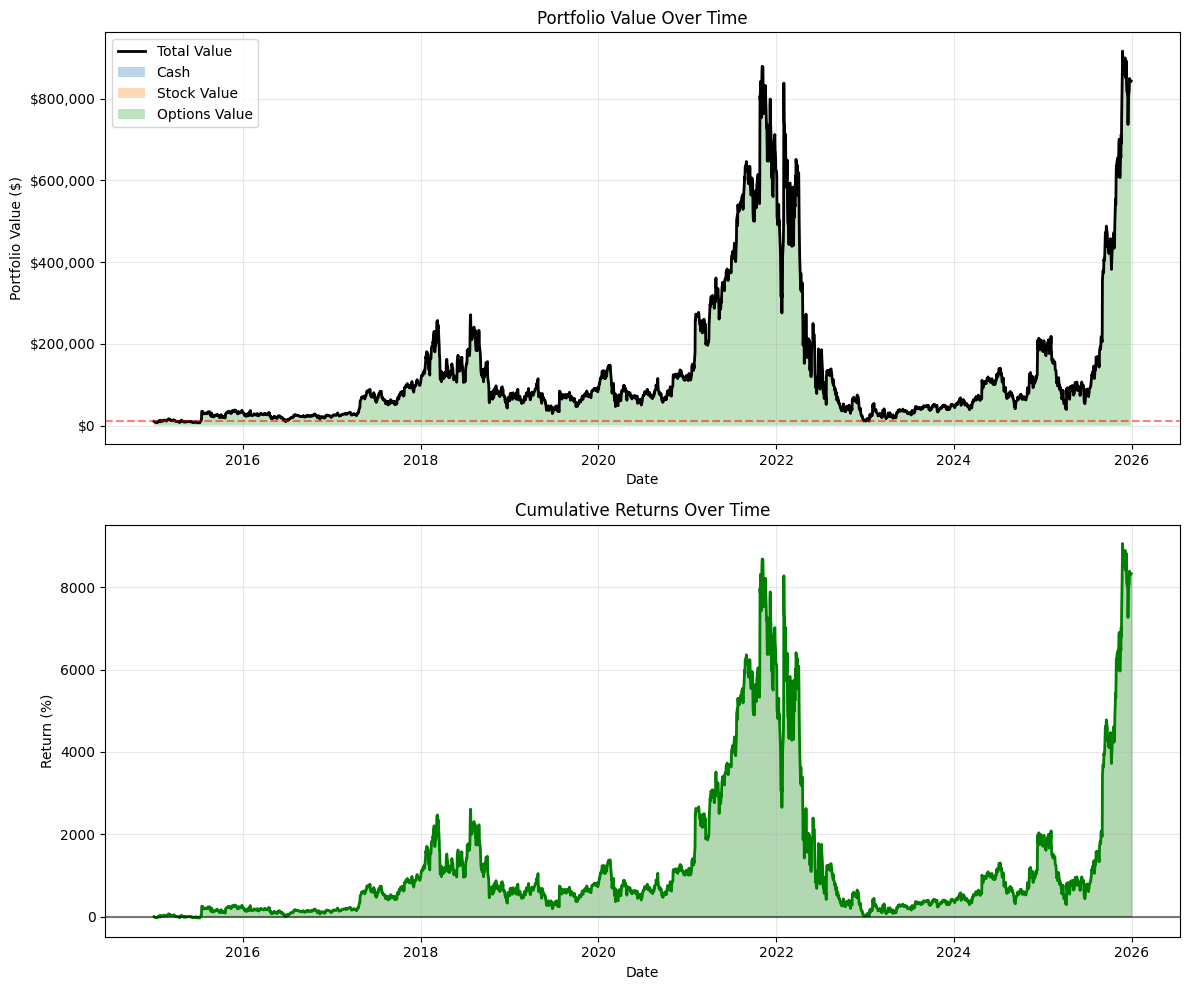


Ticker: MSFT | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $338,980.02
Total Return: 3289.80%
Sharpe Ratio: 0.91
Max Drawdown: 61.24%
Annualized Volatility: 47.75%


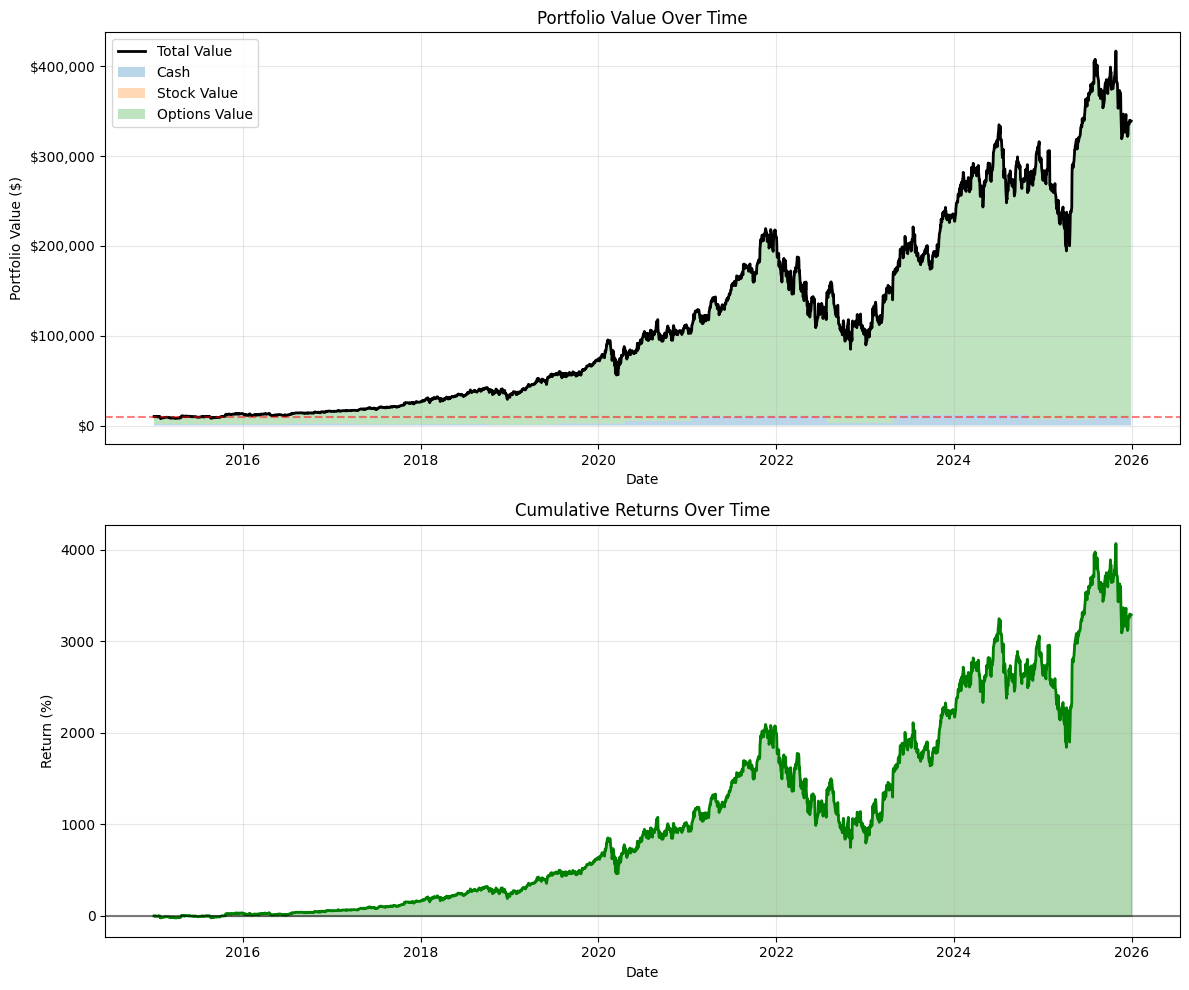


Ticker: MSFT | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $1,277,061.73
Total Return: 12670.62%
Sharpe Ratio: 0.93
Max Drawdown: 83.31%
Annualized Volatility: 85.37%


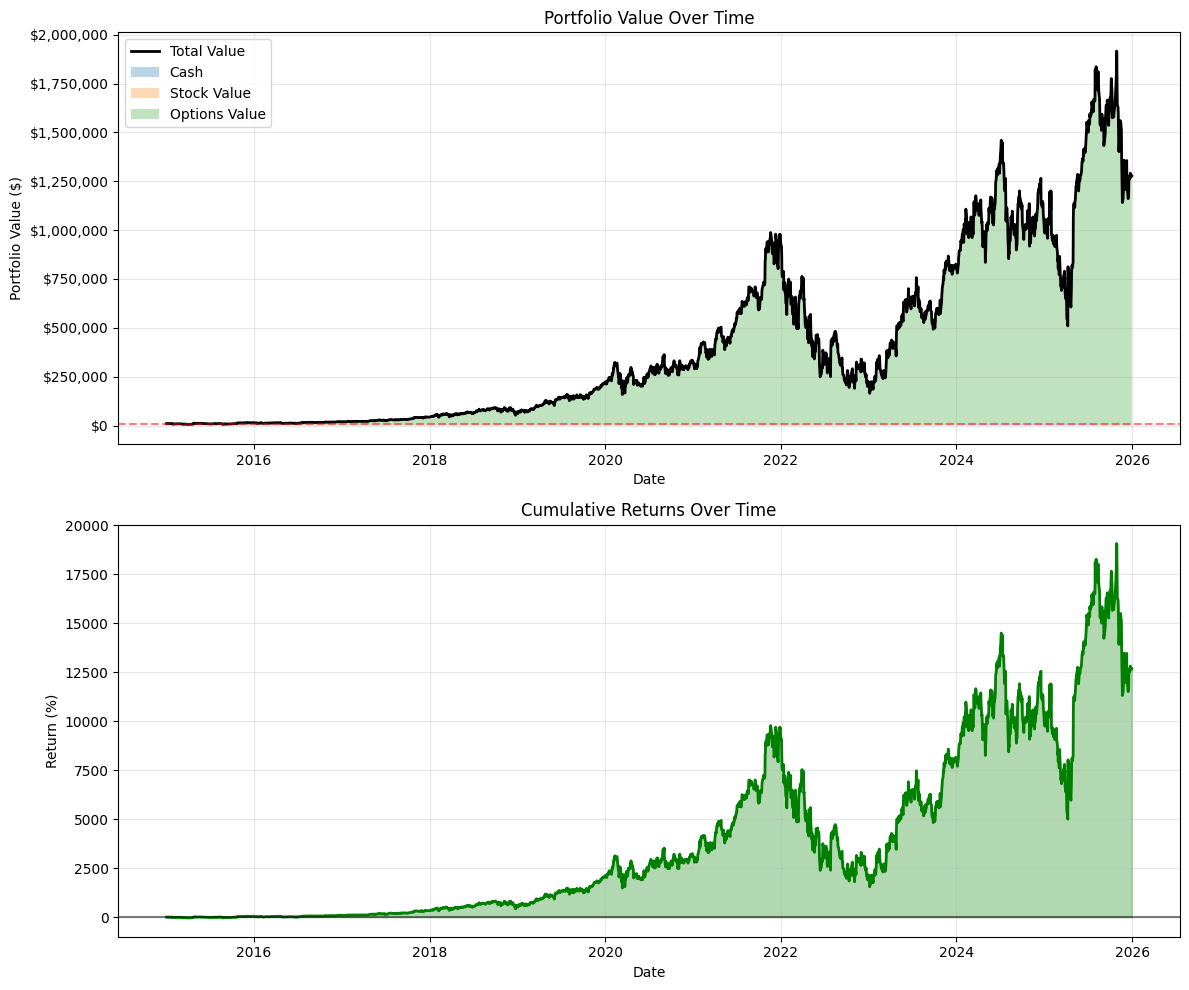


Ticker: MSFT | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $3,649,660.21
Total Return: 36396.60%
Sharpe Ratio: 1.03
Max Drawdown: 97.17%
Annualized Volatility: 187.94%


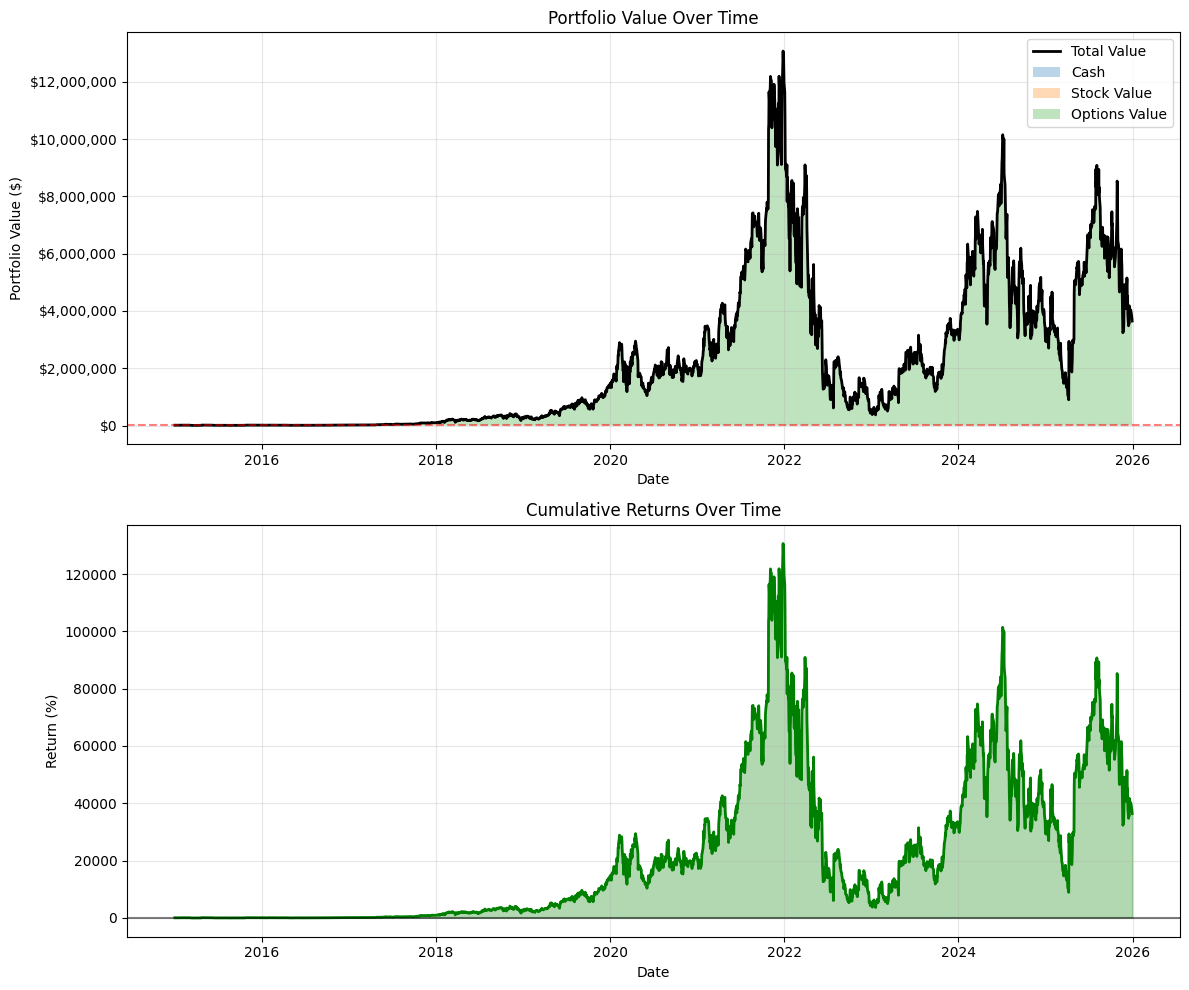


Ticker: AAPL | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $291,005.82
Total Return: 2810.06%
Sharpe Ratio: 0.85
Max Drawdown: 60.52%
Annualized Volatility: 51.84%


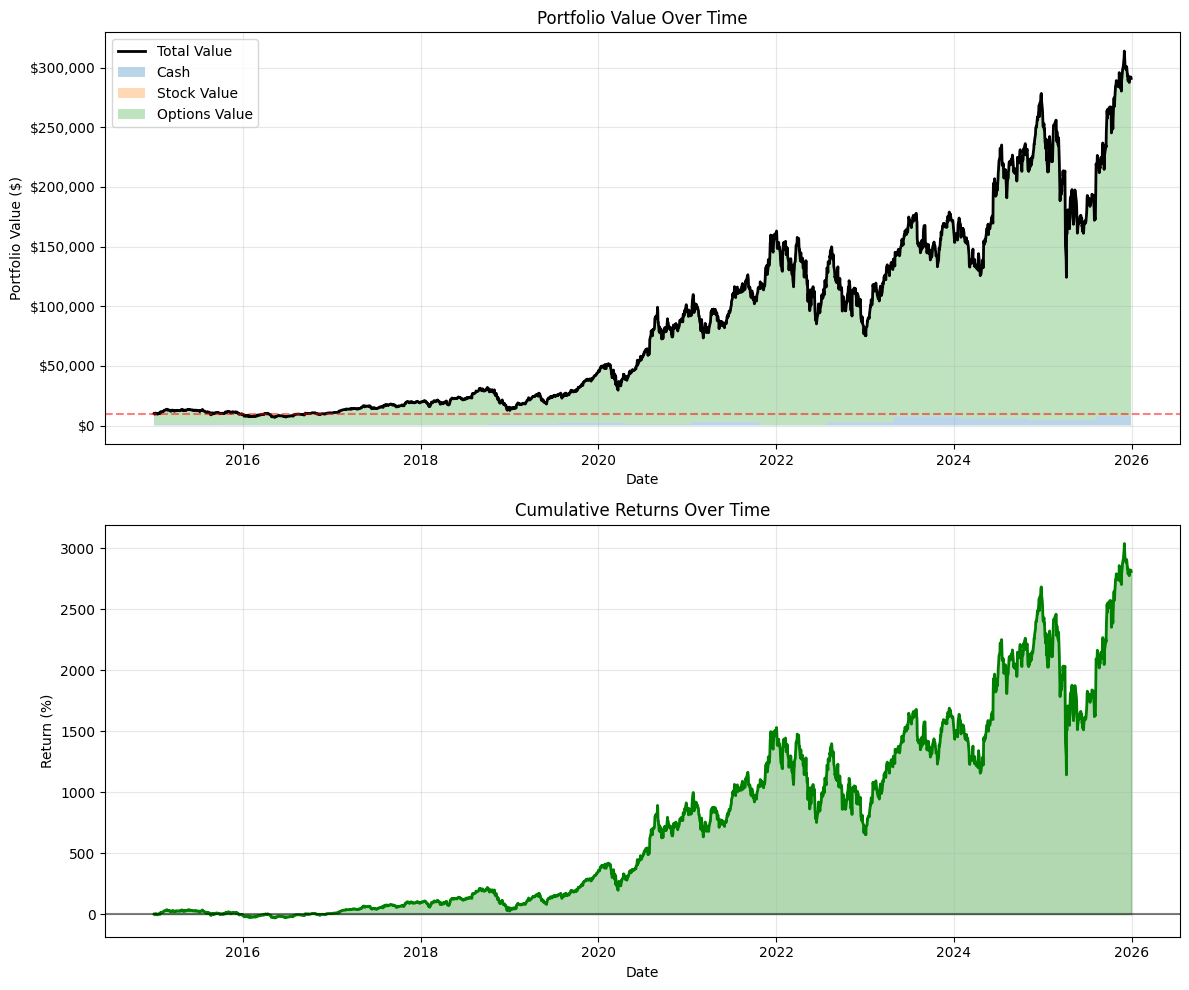


Ticker: AAPL | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $660,531.93
Total Return: 6505.32%
Sharpe Ratio: 0.85
Max Drawdown: 78.28%
Annualized Volatility: 90.96%


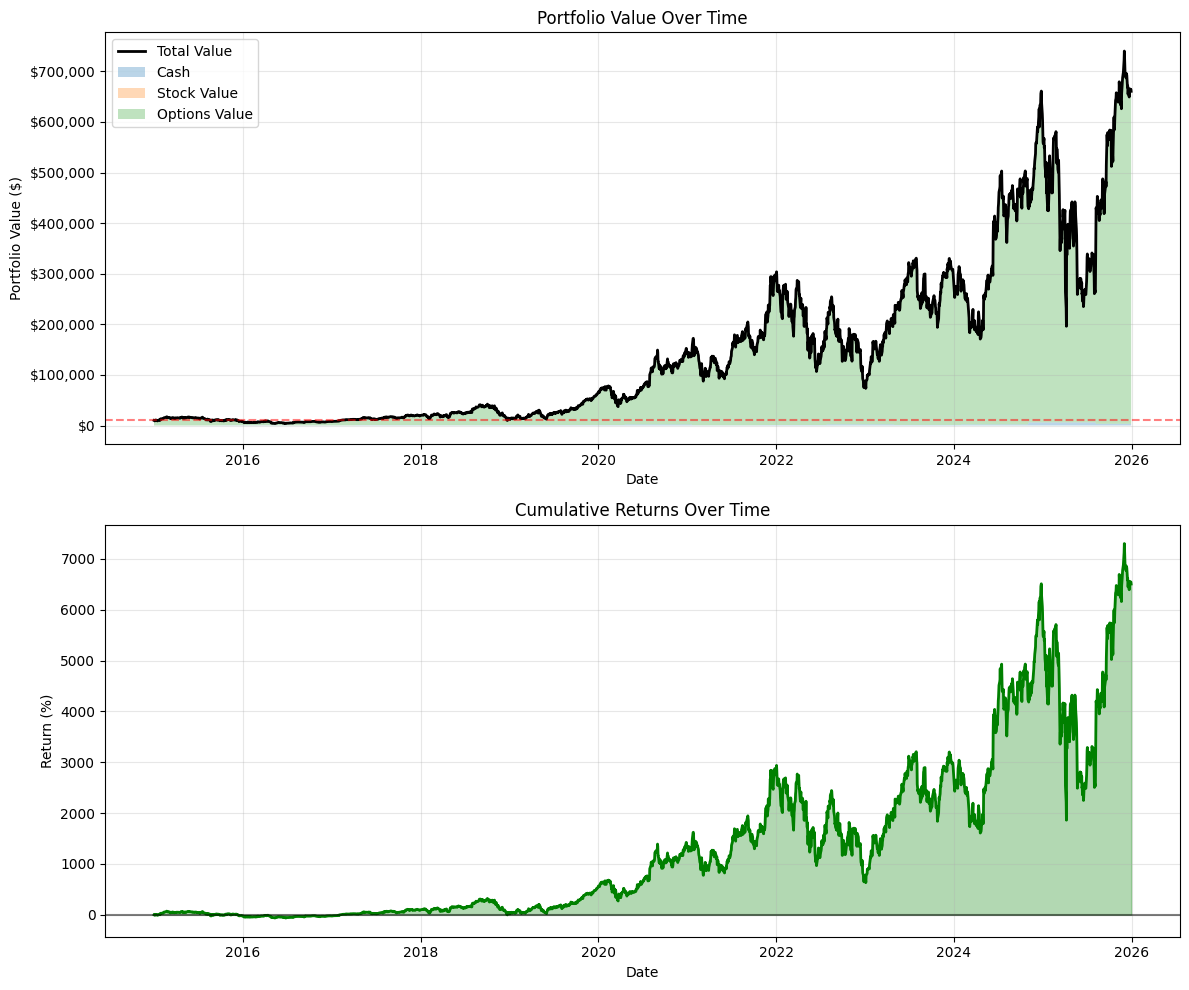


Ticker: AAPL | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $30,667.73
Total Return: 206.68%
Sharpe Ratio: 0.79
Max Drawdown: 99.28%
Annualized Volatility: 186.40%


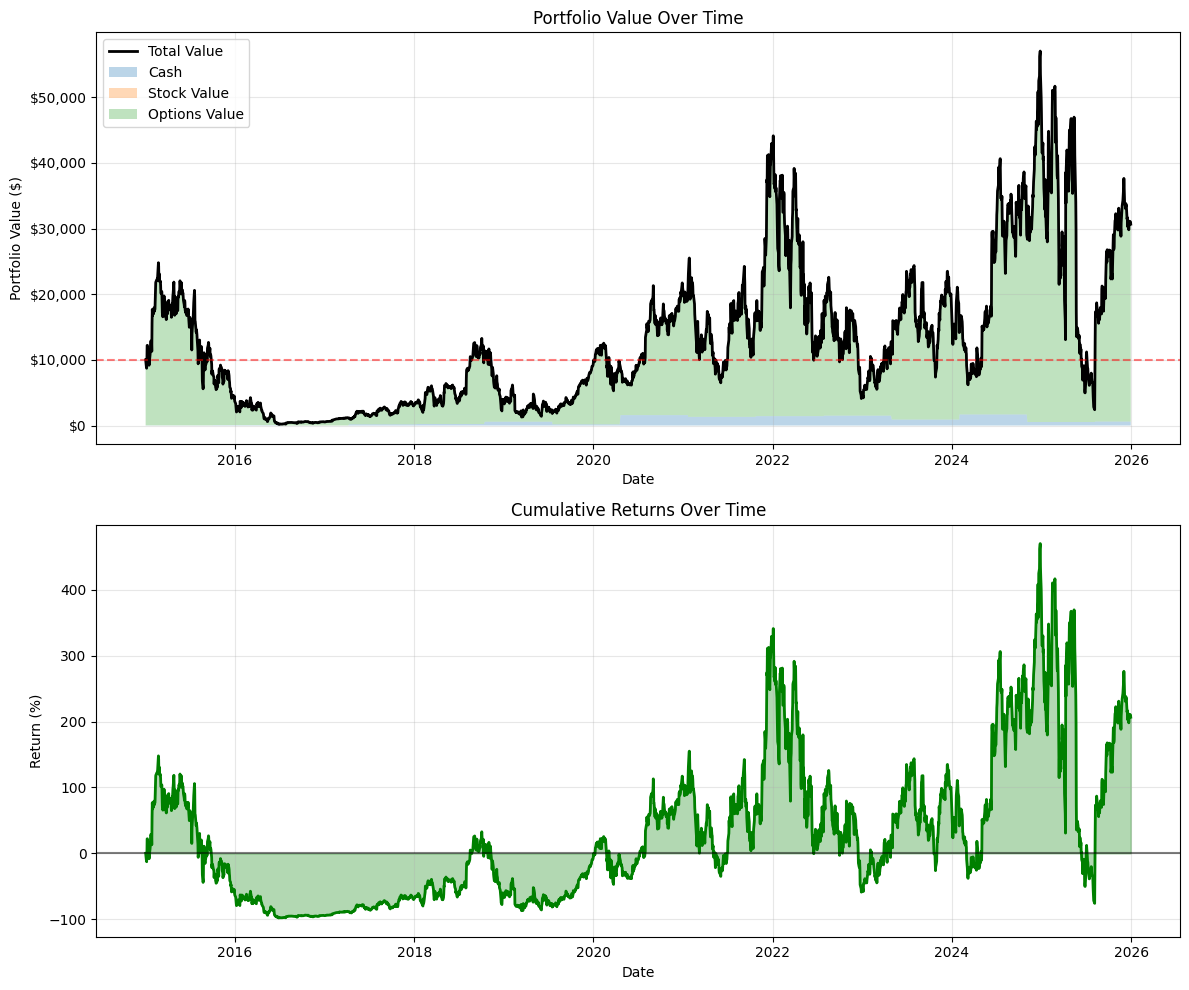


Ticker: NVDA | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $41,120,133.70
Total Return: 411101.34%
Sharpe Ratio: 1.29
Max Drawdown: 89.37%
Annualized Volatility: 88.32%


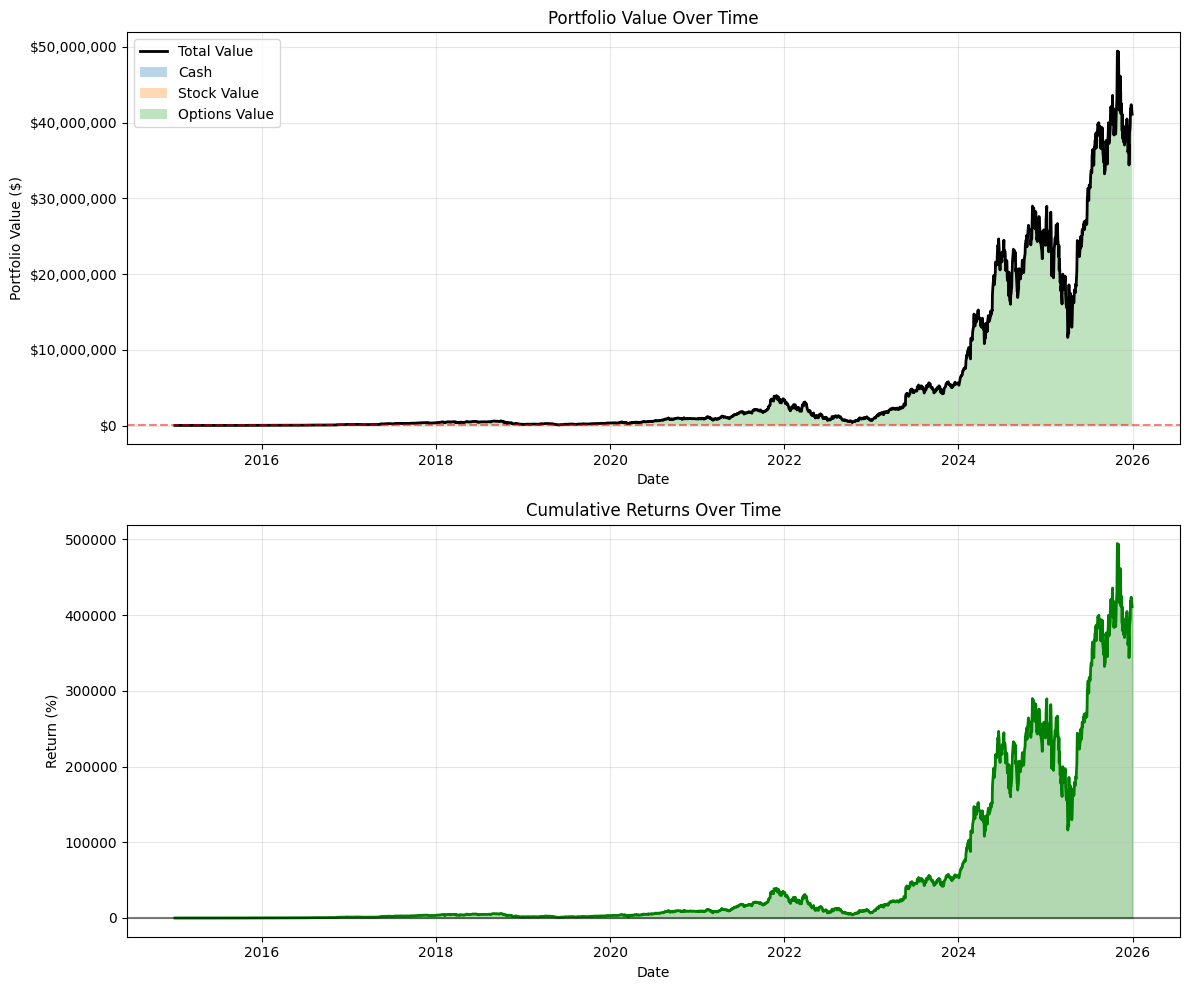


Ticker: NVDA | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $117,950,715.39
Total Return: 1179407.15%
Sharpe Ratio: 1.18
Max Drawdown: 99.00%
Annualized Volatility: 148.62%


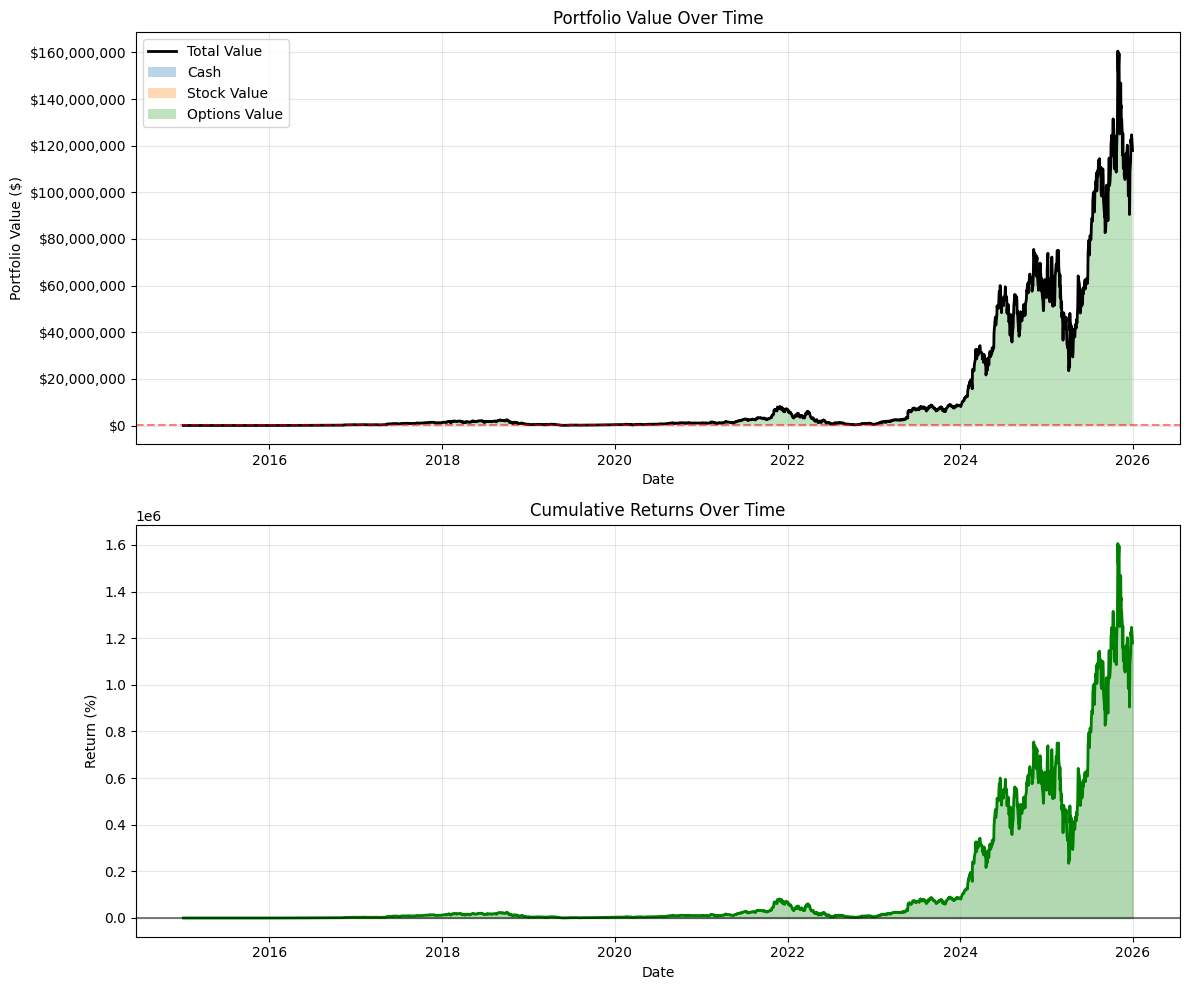


Ticker: NVDA | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $100,873,701.93
Total Return: 1008637.02%
Sharpe Ratio: 0.90
Max Drawdown: 99.97%
Annualized Volatility: 383.23%


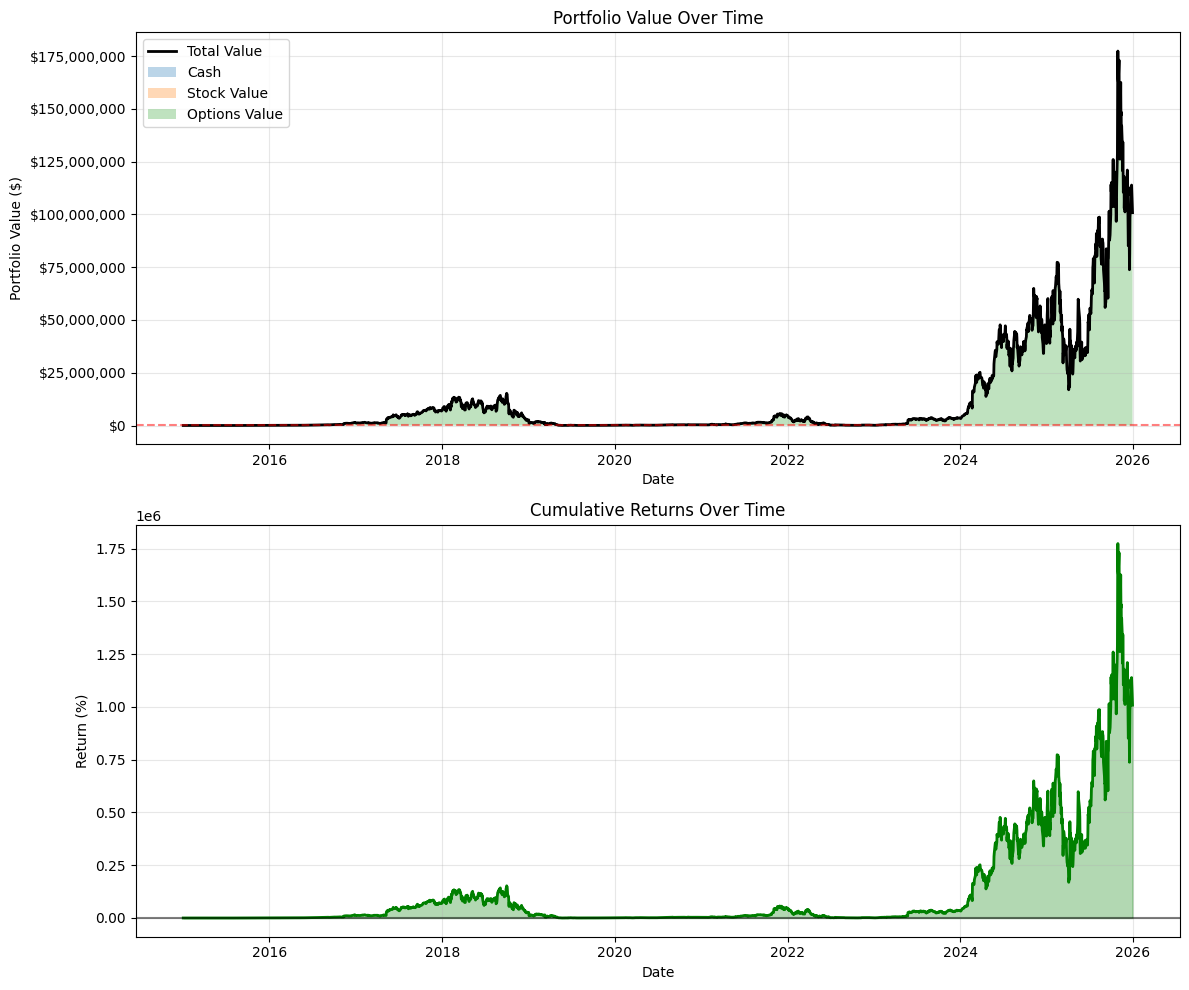


Ticker: META | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $126,271.47
Total Return: 1162.71%
Sharpe Ratio: 0.69
Max Drawdown: 87.64%
Annualized Volatility: 57.37%


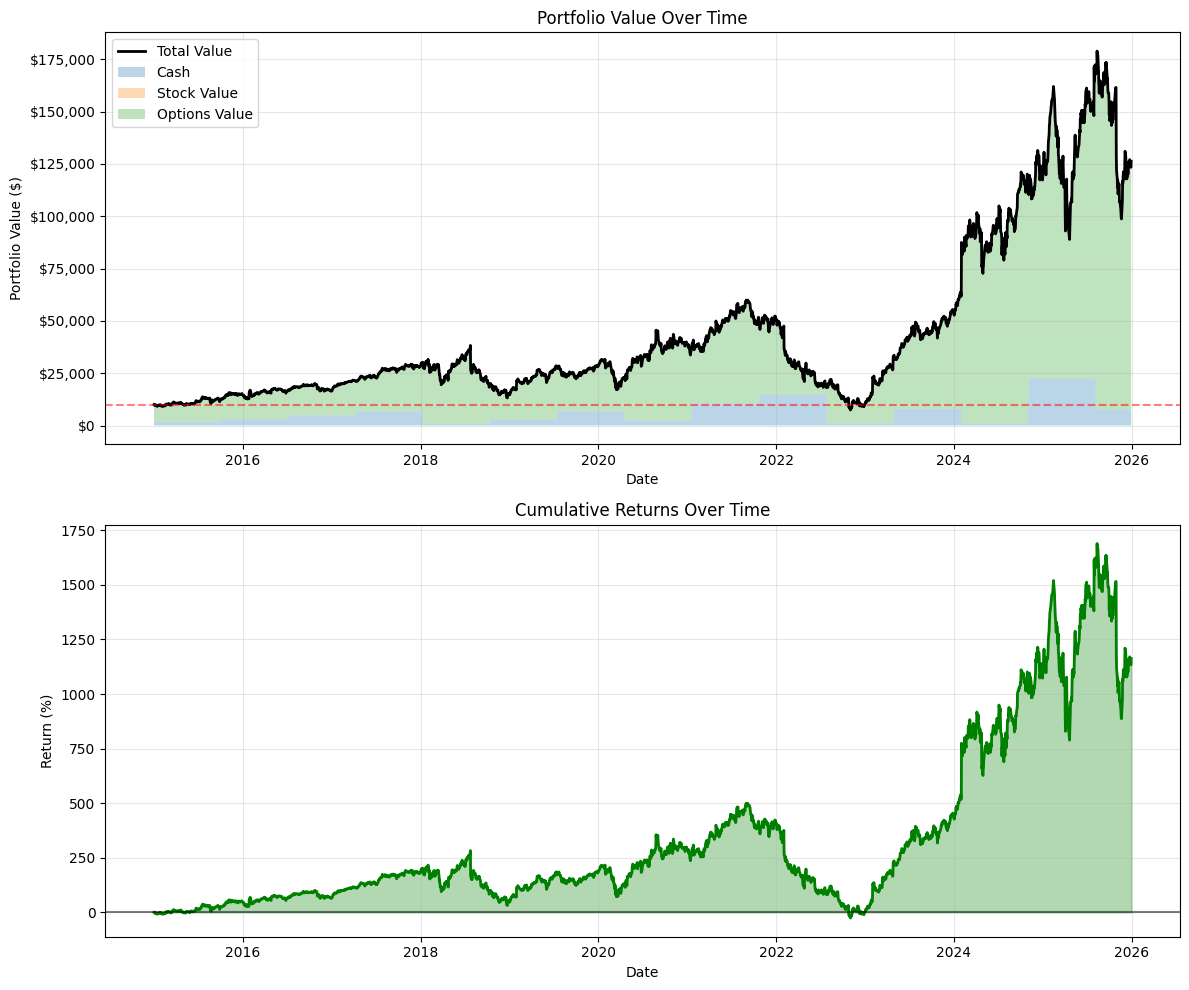


Ticker: META | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $96,451.65
Total Return: 864.52%
Sharpe Ratio: 0.66
Max Drawdown: 94.70%
Annualized Volatility: 95.76%


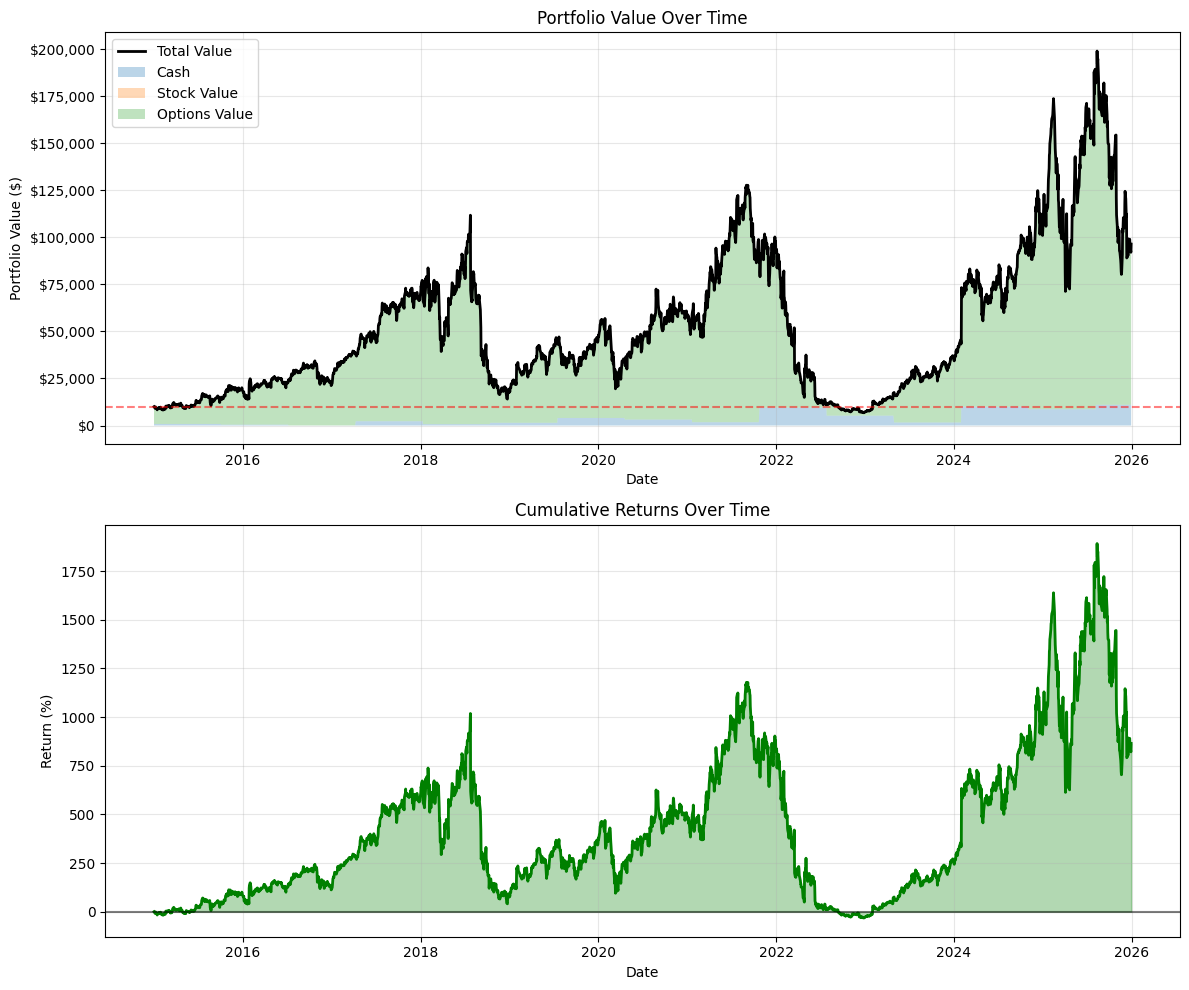


Ticker: META | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $30,772.74
Total Return: 207.73%
Sharpe Ratio: 0.83
Max Drawdown: 99.89%
Annualized Volatility: 190.88%


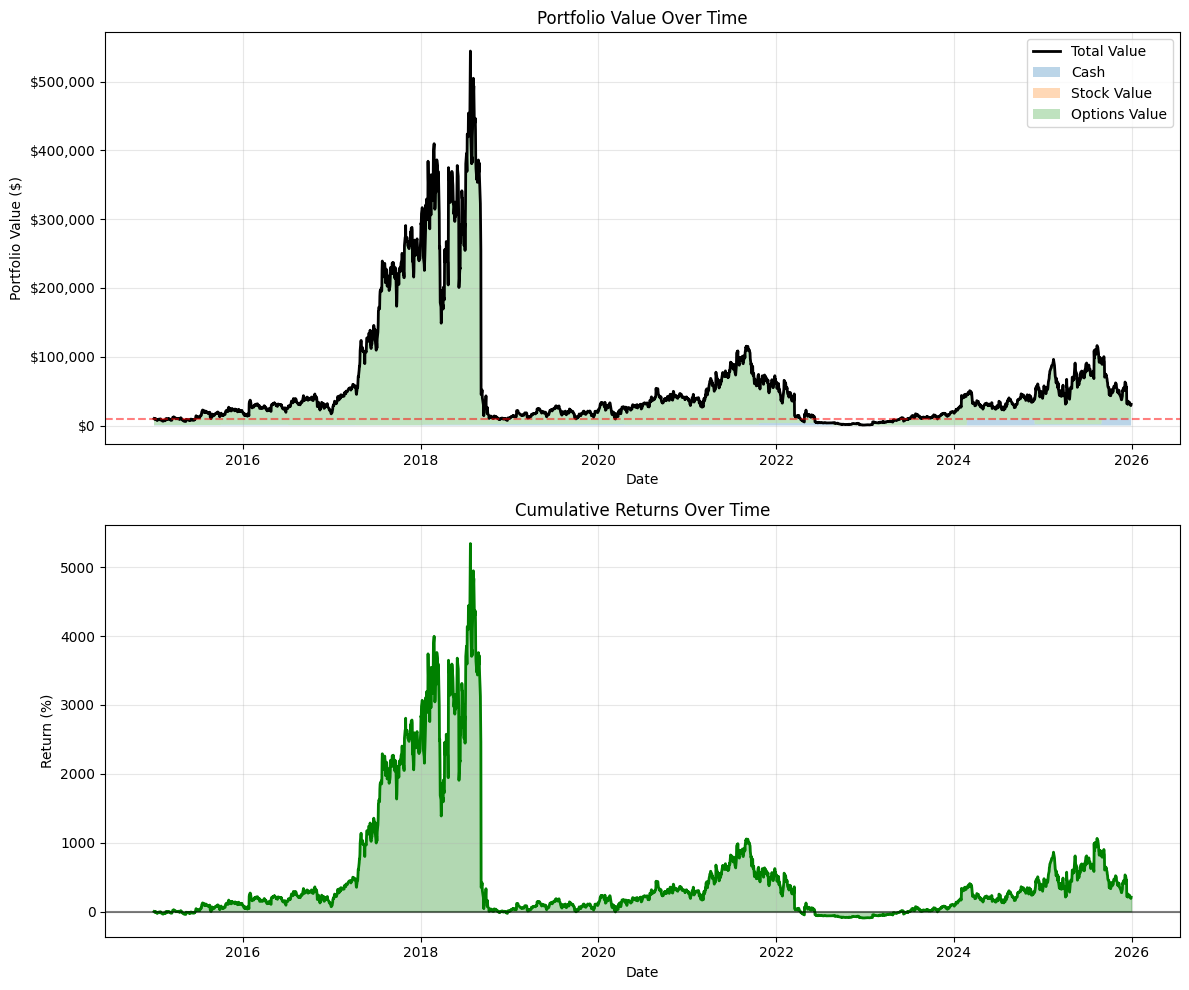


Ticker: AMZN | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $442,914.06
Total Return: 4329.14%
Sharpe Ratio: 0.86
Max Drawdown: 85.97%
Annualized Volatility: 63.71%


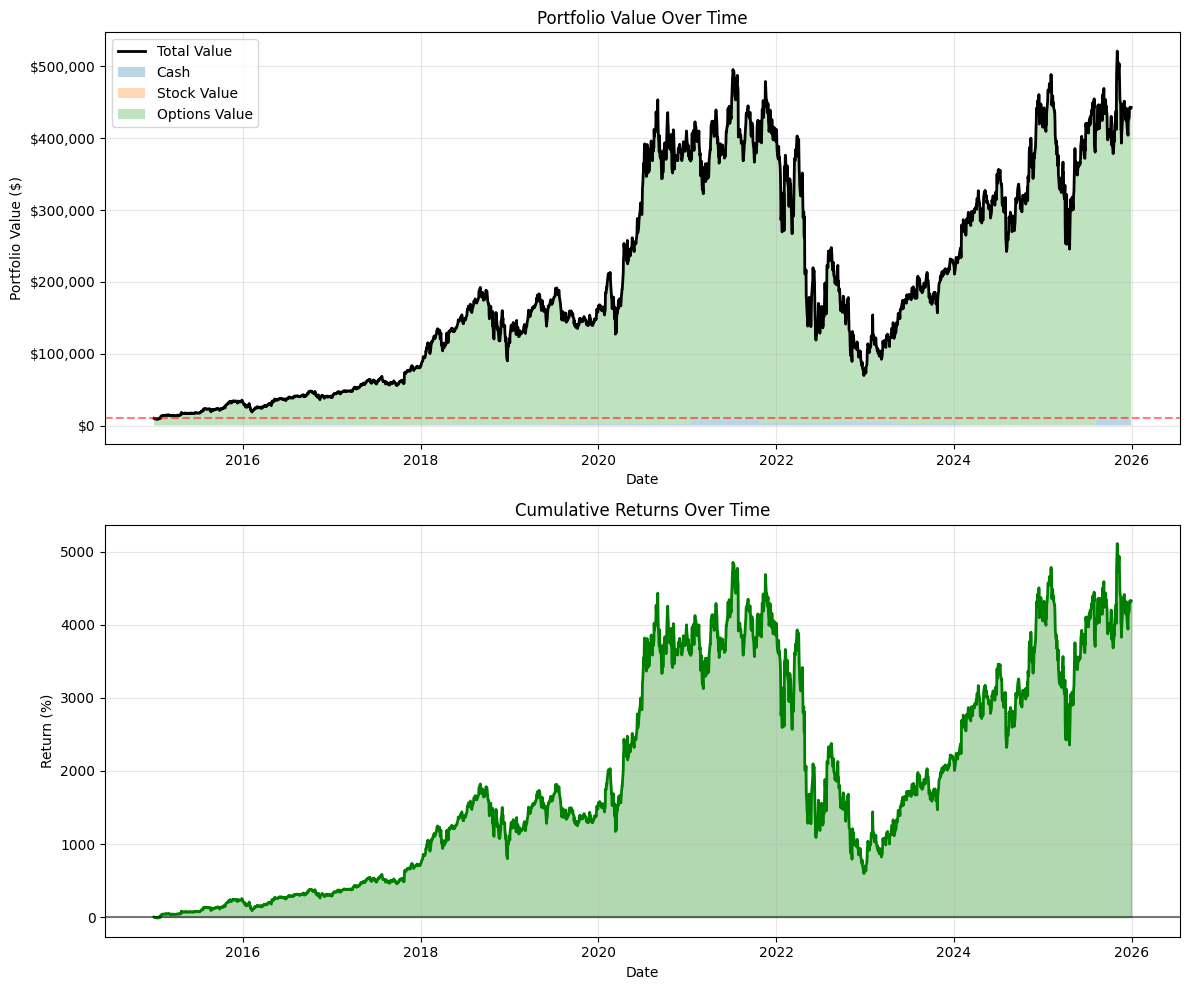


Ticker: AMZN | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $782,775.39
Total Return: 7727.75%
Sharpe Ratio: 0.88
Max Drawdown: 98.12%
Annualized Volatility: 108.77%


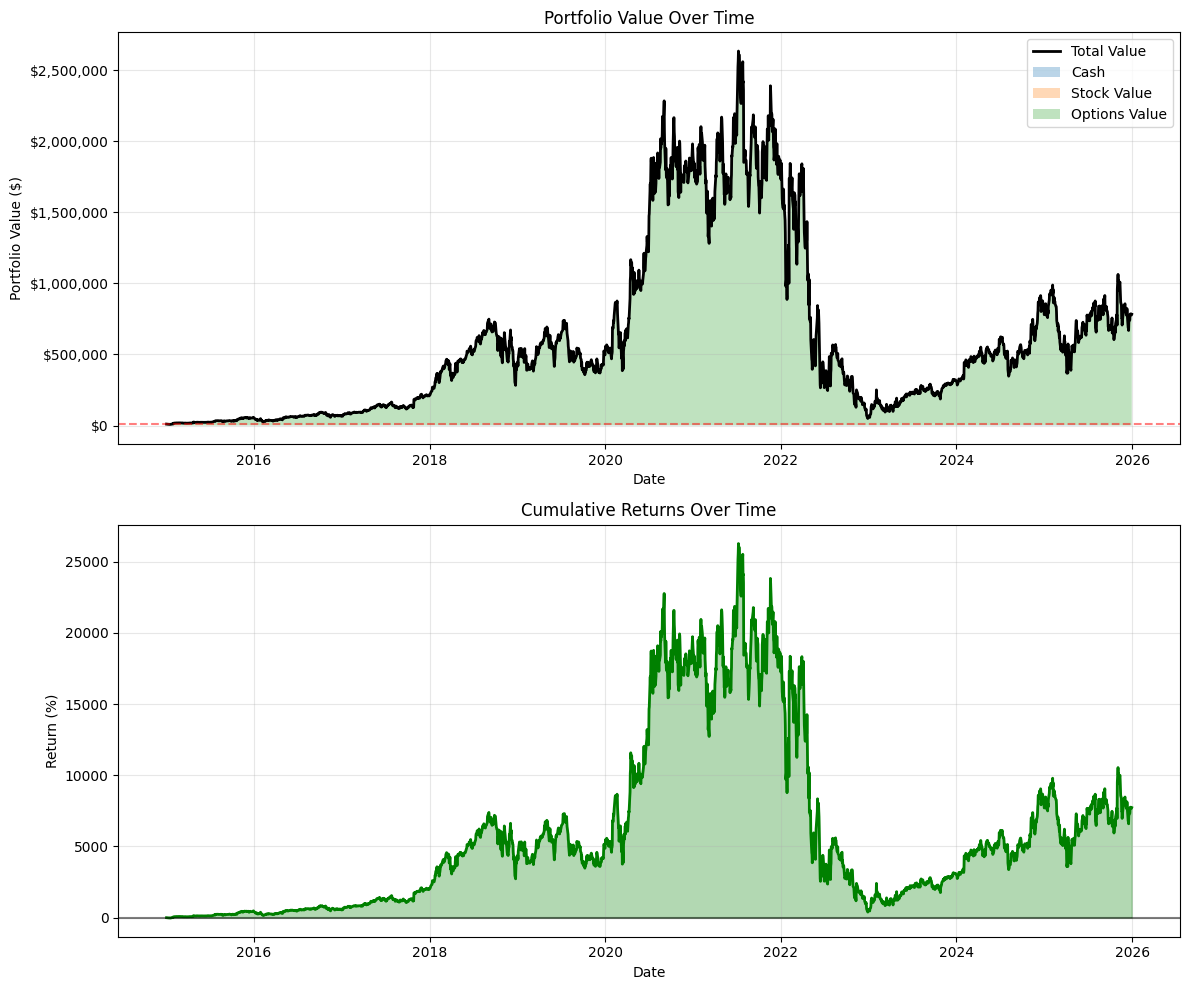


Ticker: AMZN | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $555,146.18
Total Return: 5451.46%
Sharpe Ratio: 1.03
Max Drawdown: 99.93%
Annualized Volatility: 219.90%


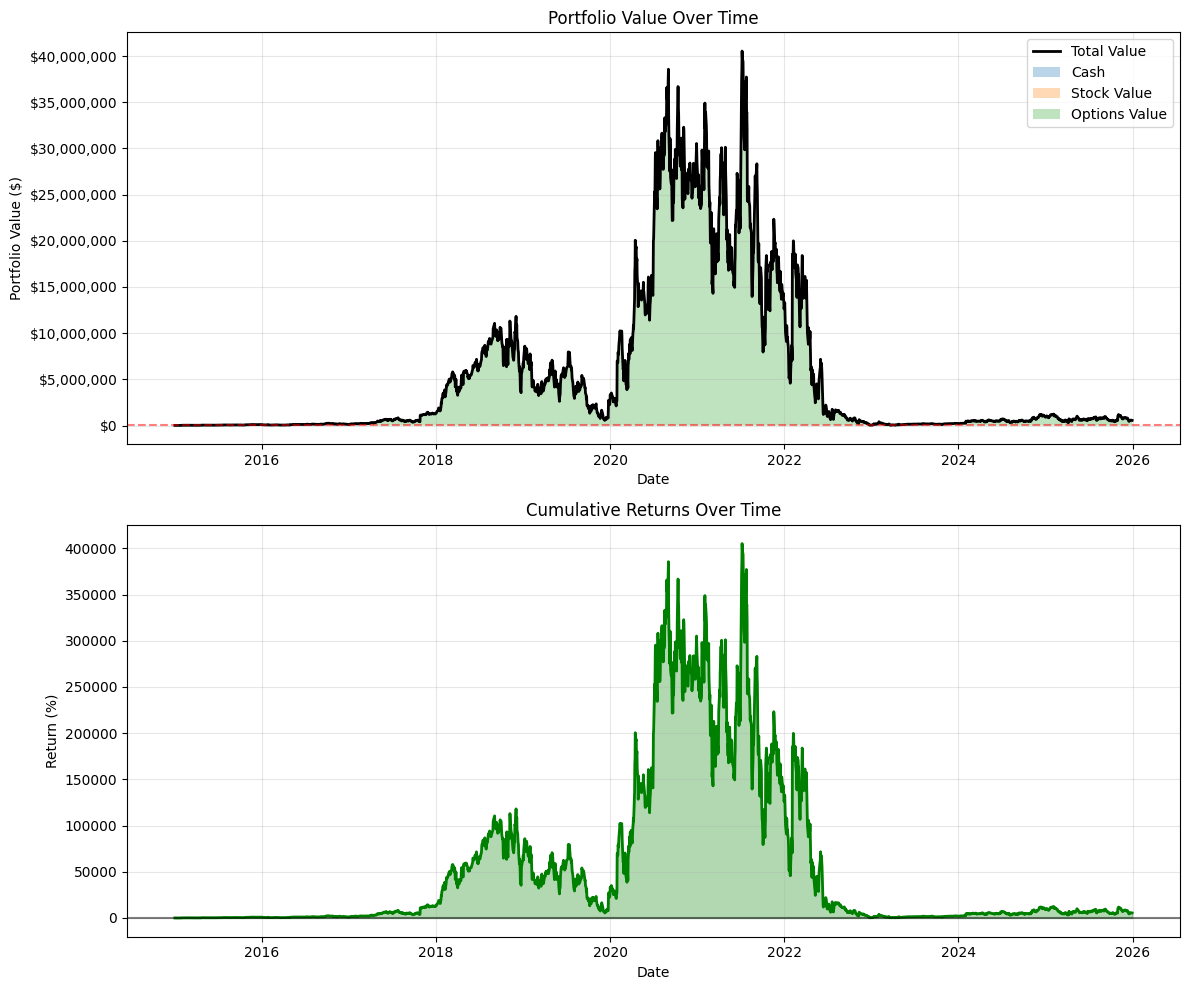


Ticker: TSLA | Strike Factor: 0.5
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $217,815.62
Total Return: 2078.16%
Sharpe Ratio: 0.77
Max Drawdown: 94.94%
Annualized Volatility: 102.17%


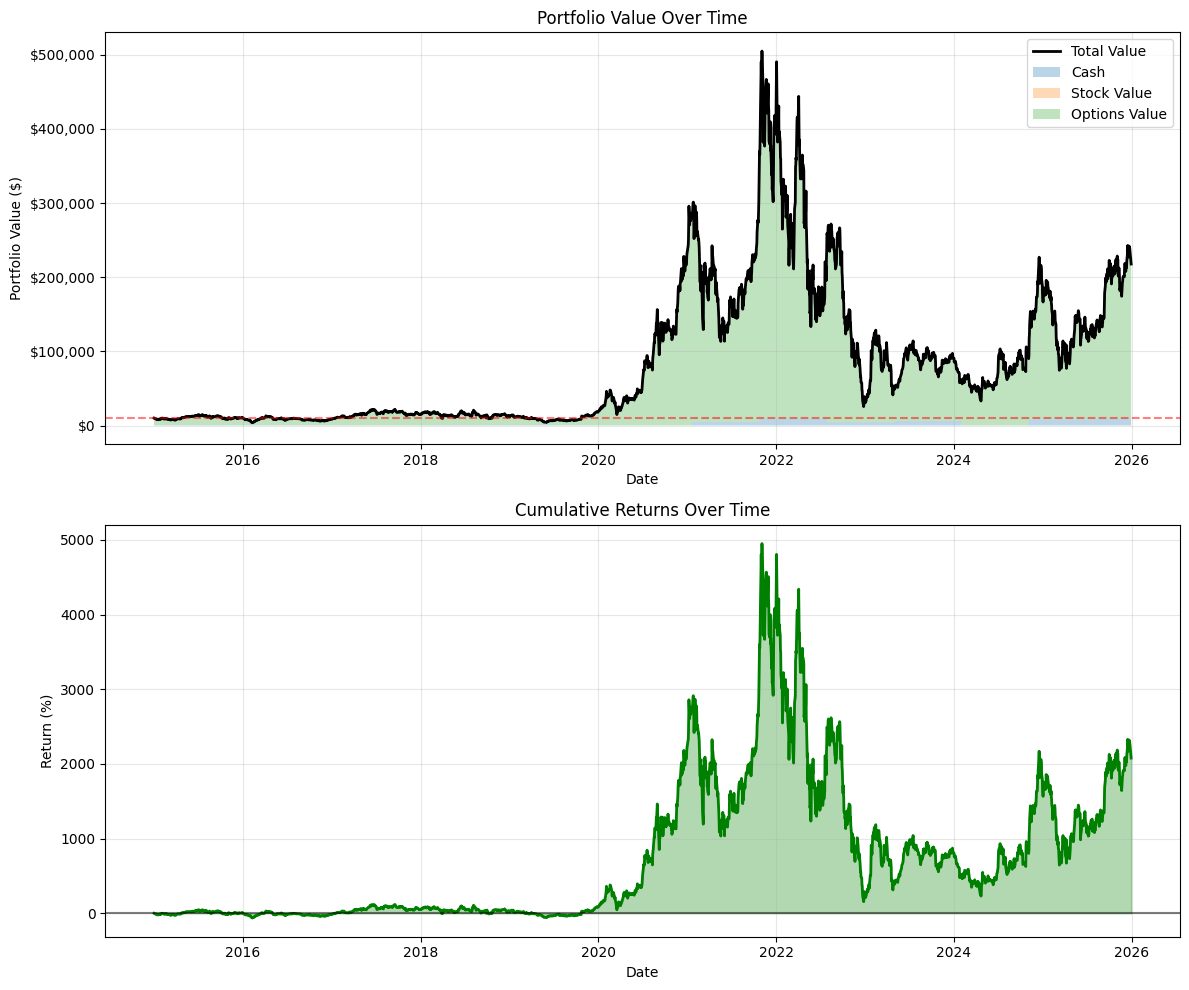


Ticker: TSLA | Strike Factor: 0.75
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $54,260.31
Total Return: 442.60%
Sharpe Ratio: 0.76
Max Drawdown: 97.59%
Annualized Volatility: 141.93%


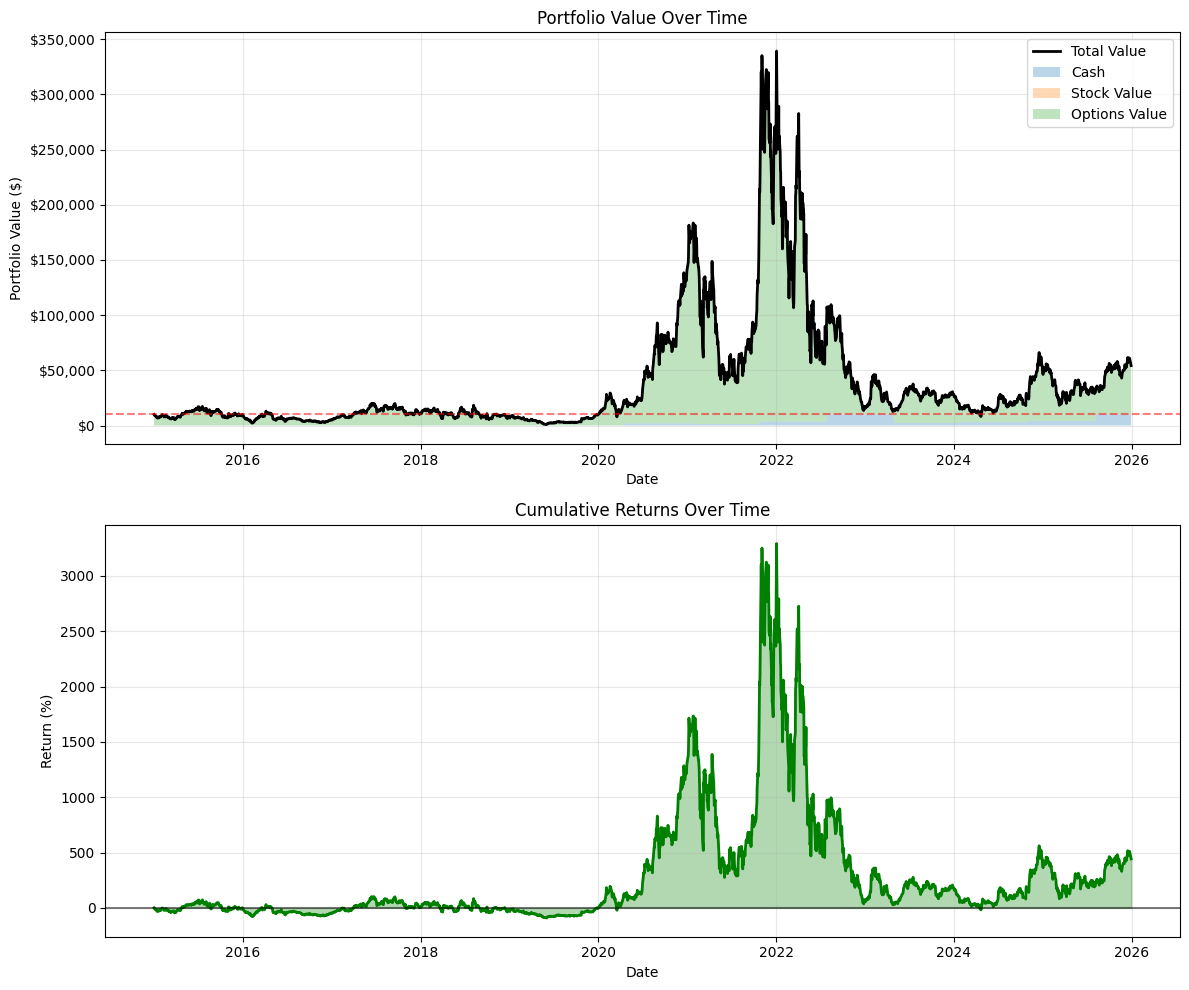


Ticker: TSLA | Strike Factor: 1
Loading market data...
Running simulation from 2015-01-02 to 2025-12-30
Total trading days: 2765


/Users/ryan/Desktop/quantitative-trading-models/strategies/leap/../../utils/simulation.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date, progress=False)



=== Performance Summary ===
Initial Value: $10,000.00
Final Value: $1,258.70
Total Return: -87.41%
Sharpe Ratio: 0.59
Max Drawdown: 98.23%
Annualized Volatility: 171.91%


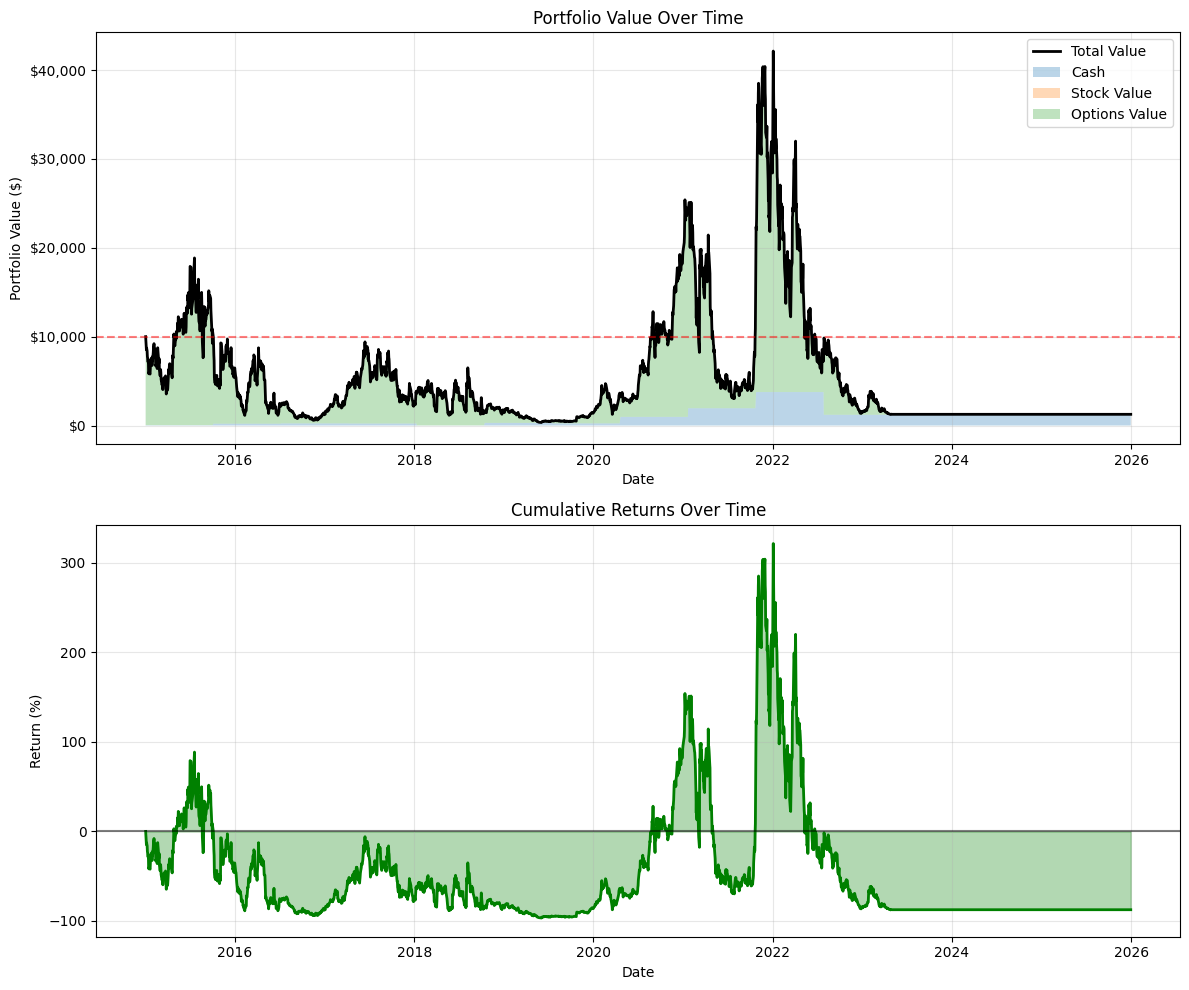


ALL RESULTS SUMMARY
ticker  strike_factor  final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
 GOOGL           0.50 3.505013e+05  3.405013e+03      0.877578     70.909763                29
 GOOGL           0.75 9.238117e+05  9.138117e+03      0.891133     91.538377                29
 GOOGL           1.00 8.429424e+05  8.329424e+03      0.975681     98.766083                29
  MSFT           0.50 3.389800e+05  3.289800e+03      0.910340     61.241424                29
  MSFT           0.75 1.277062e+06  1.267062e+04      0.928554     83.307265                29
  MSFT           1.00 3.649660e+06  3.639660e+04      1.025889     97.168399                29
  AAPL           0.50 2.910058e+05  2.810058e+03      0.849304     60.518059                29
  AAPL           0.75 6.605319e+05  6.505319e+03      0.852001     78.283887                29
  AAPL           1.00 3.066773e+04  2.066773e+02      0.790618     99.284278                29
  NVDA           0.50 4.11201

In [9]:
# Run simulations for all ticker/strike_factor combinations
results = []

print(f"Testing {len(tickers)} tickers × {len(strike_factors)} strike factors = {len(tickers) * len(strike_factors)} combinations\n")

for ticker in tickers:
    for strike_factor in strike_factors:
        print(f"\n{'='*60}")
        print(f"Ticker: {ticker} | Strike Factor: {strike_factor}")
        print('='*60)
        
        try:
            # Create strategy using the imported factory function
            strategy = create_leap_strategy(
                ticker=ticker,
                strike_factor=strike_factor,
                days=days,
                interest_rate=interest_rate,
                roll_threshold=roll_threshold
            )
            
            # Run simulation
            sim = BacktestSimulation(
                tickers=[ticker],
                start_date=start,
                end_date=end,
                initial_cash=initial_cash,
                strategy_callback=strategy
            )
            
            sim.run()
            
            # Get performance metrics
            df = pd.DataFrame(sim.history)
            final_value = df['total_value'].iloc[-1]
            total_return = (final_value / initial_cash - 1) * 100
            
            returns = df['total_value'].pct_change().dropna()
            sharpe = returns.mean() / returns.std() * np.sqrt(252) if len(returns) > 0 and returns.std() > 0 else 0
            max_dd = ((df['total_value'].cummax() - df['total_value']) / df['total_value'].cummax()).max() * 100
            
            sim.print_performance_stats()

            sim.plot_portfolio_history()
            
            # Store results
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': final_value,
                'total_return': total_return,
                'sharpe_ratio': sharpe,
                'max_drawdown': max_dd,
                'num_transactions': len(sim.transactions)
            })
            
        except Exception as e:
            print(f"Error with {ticker} at strike {strike_factor}: {e}")
            results.append({
                'ticker': ticker,
                'strike_factor': strike_factor,
                'final_value': initial_cash,
                'total_return': 0,
                'sharpe_ratio': 0,
                'max_drawdown': 0,
                'num_transactions': 0
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("ALL RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))


BEST RESULTS BY TICKER
ticker  strike_factor  final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
  AAPL           0.75 6.605319e+05   6505.319269      0.852001     78.283887                29
  AMZN           1.00 5.551462e+05   5451.461842      1.030194     99.929889                29
 GOOGL           1.00 8.429424e+05   8329.424473      0.975681     98.766083                29
  META           1.00 3.077274e+04    207.727441      0.830737     99.891705                29
  MSFT           1.00 3.649660e+06  36396.602147      1.025889     97.168399                29
  NVDA           0.50 4.112013e+07 411101.336976      1.288664     89.368298                29
  TSLA           0.50 2.178156e+05   2078.156230      0.773222     94.937664                29

TOP 10 OVERALL (by Sharpe Ratio)
ticker  strike_factor  final_value  total_return  sharpe_ratio  max_drawdown  num_transactions
  NVDA           0.50 4.112013e+07  4.111013e+05      1.288664     89.368298           

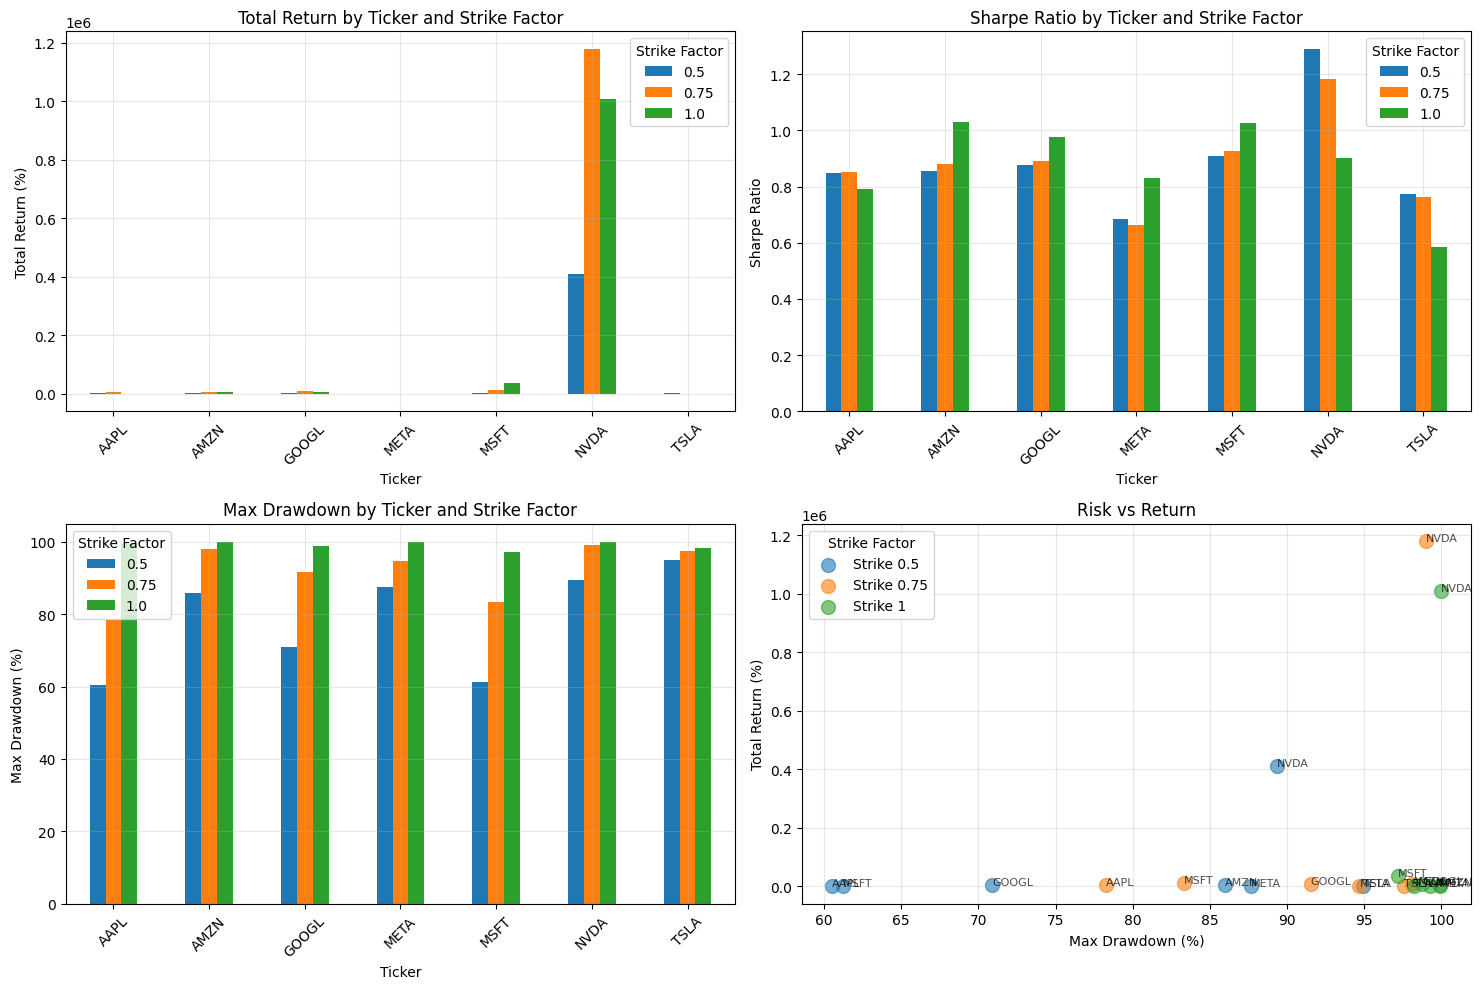

In [10]:
# Analyze results by ticker and strike factor
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*80)
print("BEST RESULTS BY TICKER")
print("="*80)
best_by_ticker = results_df.loc[results_df.groupby('ticker')['sharpe_ratio'].idxmax()]
print(best_by_ticker.to_string(index=False))

print("\n" + "="*80)
print("TOP 10 OVERALL (by Sharpe Ratio)")
print("="*80)
print(results_df.sort_values('sharpe_ratio', ascending=False).head(10).to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total Return by Ticker and Strike Factor
pivot_return = results_df.pivot(index='ticker', columns='strike_factor', values='total_return')
pivot_return.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Total Return by Ticker and Strike Factor')
axes[0, 0].set_ylabel('Total Return (%)')
axes[0, 0].set_xlabel('Ticker')
axes[0, 0].legend(title='Strike Factor')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Sharpe Ratio by Ticker and Strike Factor
pivot_sharpe = results_df.pivot(index='ticker', columns='strike_factor', values='sharpe_ratio')
pivot_sharpe.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Sharpe Ratio by Ticker and Strike Factor')
axes[0, 1].set_ylabel('Sharpe Ratio')
axes[0, 1].set_xlabel('Ticker')
axes[0, 1].legend(title='Strike Factor')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Max Drawdown by Ticker
pivot_dd = results_df.pivot(index='ticker', columns='strike_factor', values='max_drawdown')
pivot_dd.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Max Drawdown by Ticker and Strike Factor')
axes[1, 0].set_ylabel('Max Drawdown (%)')
axes[1, 0].set_xlabel('Ticker')
axes[1, 0].legend(title='Strike Factor')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Risk-Return Scatter
for strike_factor in strike_factors:
    subset = results_df[results_df['strike_factor'] == strike_factor]
    axes[1, 1].scatter(subset['max_drawdown'], subset['total_return'], 
                      label=f'Strike {strike_factor}', s=100, alpha=0.6)
    
    # Add ticker labels
    for _, row in subset.iterrows():
        axes[1, 1].annotate(row['ticker'], 
                           (row['max_drawdown'], row['total_return']),
                           fontsize=8, alpha=0.7)

axes[1, 1].set_title('Risk vs Return')
axes[1, 1].set_xlabel('Max Drawdown (%)')
axes[1, 1].set_ylabel('Total Return (%)')
axes[1, 1].legend(title='Strike Factor')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()